# Meta Data

In [1]:
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import pickle

### 전체 인원수

In [3]:
file_path = f'/home/data/data_Voxceleb/vox1_meta.csv'

# CSV 파일 읽기, 헤더가 없음을 명시
data = pd.read_csv(file_path, sep='\t')

# 상위 5개 행을 인덱스 없이 출력
top_5_rows = data.head().to_string(index=False,header=True)
print(top_5_rows)
print(data.shape[0])


VoxCeleb1 ID  VGGFace1 ID Gender Nationality Set
     id10001 A.J._Buckley      m     Ireland dev
     id10002  A.R._Rahman      m       India dev
     id10003   Aamir_Khan      m       India dev
     id10004  Aaron_Tveit      m         USA dev
     id10005    Aaron_Yoo      m         USA dev
1251


### 성비

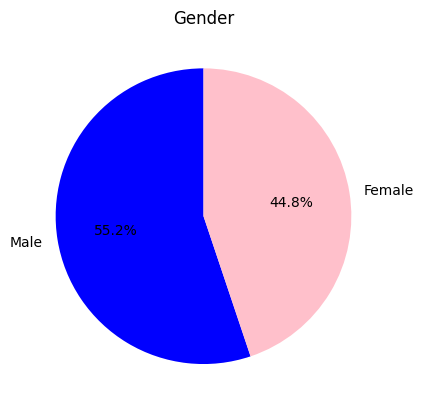

Gender
Male      690
Female    561
Name: count, dtype: int64


In [4]:
# 'F'와 'M'의 개수 카운트
count_fm = data['Gender'].value_counts()
# 인덱스 이름 변경 ('F' -> 'Female', 'M' -> 'Male')
count_fm.index = count_fm.index.map({'m': 'Male','f': 'Female'})

# 원 그래프 생성
plt.pie(count_fm, labels=count_fm.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

plt.title('Gender')  # 그래프 제목
plt.show()

print(count_fm)

### 인종

<Axes: xlabel='Nationality'>

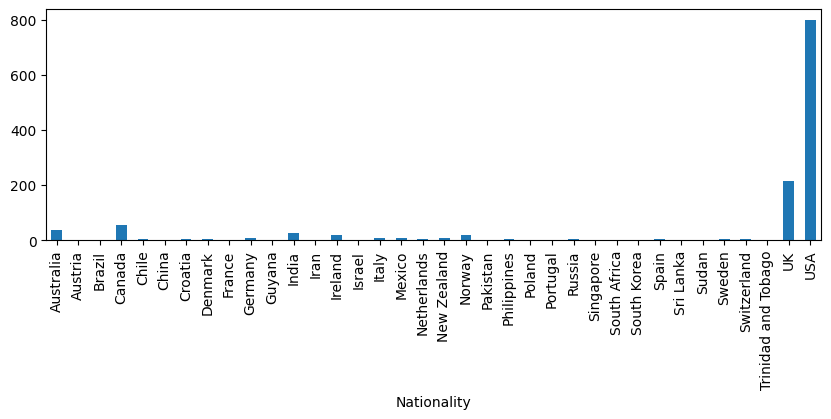

In [5]:
# 데이터 카운트 및 정렬
count_fm = data['Nationality'].value_counts()
count_fm = count_fm.sort_index()

# 바 그래프 생성
count_fm.plot(kind='bar',figsize=(10,3))


In [6]:
# Nationality 열의 각 값이 몇 번 나타나는지 카운트
count_fm = data['Nationality'].value_counts()

# 고유한 값들을 확인
unique_nationalities = count_fm.index

# 고유한 값들을 출력
print(unique_nationalities)


Index(['USA', 'UK', 'Canada', 'Australia', 'India', 'Norway', 'Ireland',
       'Germany', 'New Zealand', 'Italy', 'Mexico', 'Sweden', 'Russia',
       'Spain', 'Netherlands', 'Philippines', 'Chile', 'Croatia',
       'Switzerland', 'Denmark', 'China', 'Poland', 'Portugal', 'Sudan',
       'France', 'Guyana', 'South Korea', 'Pakistan', 'Singapore', 'Sri Lanka',
       'Brazil', 'Israel', 'Trinidad and Tobago', 'Austria', 'South Africa',
       'Iran'],
      dtype='object', name='Nationality')


In [7]:
# 대륙 별 국가 리스트
north_america = ['USA', 'Canada', 'Mexico']
south_america = ['Chile', 'Brazil', 'Guyana', 'Trinidad and Tobago']
europe = ['UK', 'Norway', 'Ireland', 'Germany', 'Italy', 'Sweden', 'Russia', 'Spain', 
          'Netherlands', 'Croatia', 'Switzerland', 'Denmark', 'Poland', 'Portugal', 'France', 
          'Austria']
asia = ['India', 'Philippines', 'China', 'South Korea', 'Pakistan', 'Singapore', 
        'Sri Lanka', 'Israel', 'Iran']
oceania = ['Australia', 'New Zealand']
africa = ['South Africa', 'Sudan']
middle_east = ['Israel', 'Iran']

# 데이터 프레임에 새로운 열을 추가하여 대륙 구분
def get_continent(country):
    if country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in oceania:
        return 'Oceania'
    elif country in africa:
        return 'Africa'
    elif country in middle_east:
        return 'Middle East'
    else:
        return 'Unknown'

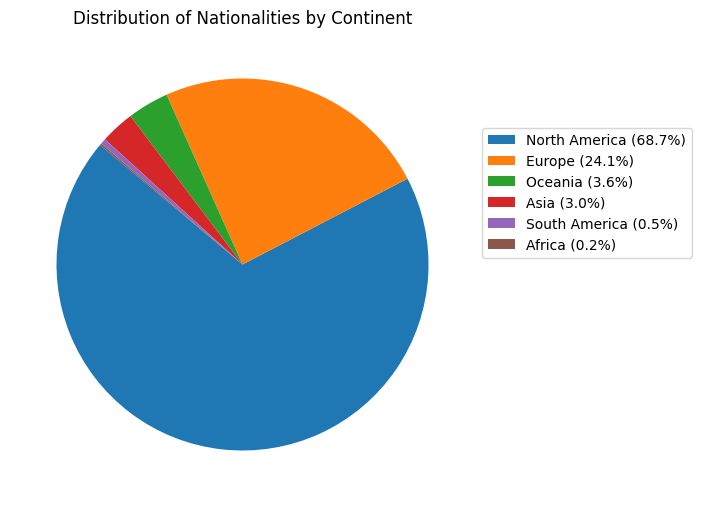

In [13]:


data['Continent'] = data['Nationality'].apply(get_continent)

# 대륙별 카운트 계산
continent_counts = data['Continent'].value_counts()

# 파이 그래프 그리기
plt.figure(figsize=(6, 8))

# 범례 텍스트를 생성
legend_labels = [f'{label} ({pct:.1f}%)' for label, pct in zip(continent_counts.index, continent_counts / continent_counts.sum() * 100)]

# 파이 그래프 그리기 (범례만 추가)
continent_counts.plot(kind='pie', labels=None, autopct=None, pctdistance=1.1, startangle=140, legend=False)

# 범례 추가
plt.legend(legend_labels, loc='lower left', bbox_to_anchor=(1, 0.5))

plt.ylabel('')
plt.title('Distribution of Nationalities by Continent')
plt.show()